In [2]:
import tensorflow as tf
tf.enable_eager_execution()

In [3]:
#objective => to create a high acucracy cNN on MNIST data=> 99.5%


import pandas as pd
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")#we save data downloaded at tmp
train = pd.DataFrame(mnist.train.images)
target = pd.DataFrame(mnist.train.labels)
test = pd.DataFrame(mnist.test.images)
testLabels = pd.DataFrame(mnist.test.labels)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
testLabels[:5]

,0
0,7
1,2
2,1
3,0
4,4


In [4]:
from keras.models import Sequential #used to build models layer by layer
from keras.layers.core import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [5]:
pip install seaborn

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import seaborn as sns
from subprocess import check_output
%matplotlib inline

In [7]:
print(train.shape)
train.head()

(55000, 784)


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
target.shape
z_train = Counter(target.values.ravel())
z_train

Counter({7: 5715,
         3: 5638,
         4: 5307,
         6: 5417,
         1: 6179,
         8: 5389,
         0: 5444,
         9: 5454,
         2: 5470,
         5: 4987})

In [12]:
target.shape

(55000, 1)

/usr/local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

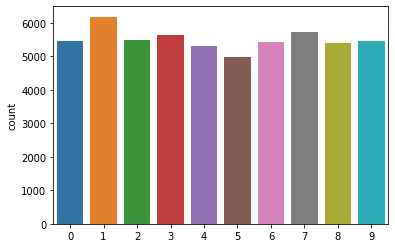

In [13]:
sns.countplot(target.values.ravel())

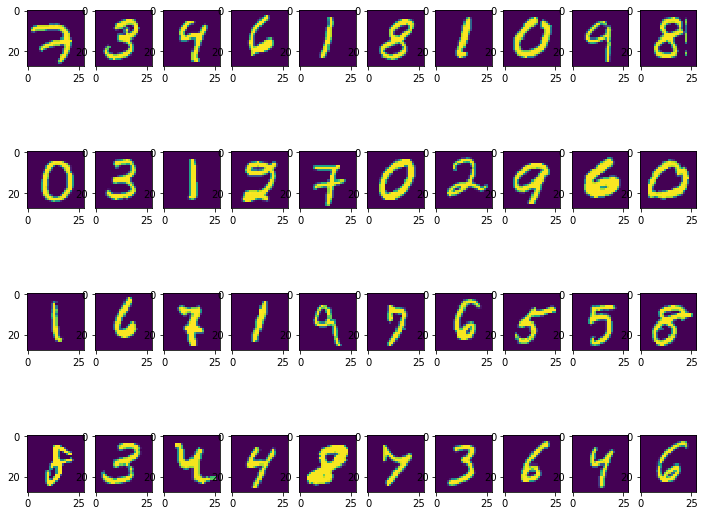

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
# preview the images first
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(train.values[i].reshape((28,28)),interpolation='nearest')
plt.show()

In [8]:
test.shape

(10000, 784)

In [9]:
train.shape

(55000, 784)

In [7]:

from keras import Model
#from tf.keras.applications.resnet101 import ResNet101


In [8]:
X_train = train.values.reshape(train.shape[0], 28, 28)
X_test = test.values.reshape(test.shape[0], 28, 28)


In [9]:
X_train.shape

(55000, 28, 28)

In [10]:
target.shape

(55000, 1)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, target, test_size = 0.1, random_state=42)

In [13]:
X_val.shape

(5500, 28, 28)

In [14]:
Y_val.shape

(5500, 1)

In [15]:
import numpy as np
X_trainrgb=np.repeat(X_train[...,np.newaxis], 3, -1)
X_trainrgb.shape

(49500, 28, 28, 3)

In [16]:
X_valrgb=np.repeat(X_val[..., np.newaxis], 3, -1)
X_valrgb.shape

(5500, 28, 28, 3)

In [17]:
X_testrgb=np.repeat(X_test[..., np.newaxis], 3, -1)
X_testrgb.shape

(10000, 28, 28, 3)

In [18]:
type(X_testrgb)

numpy.ndarray

In [19]:
X_testrgb=np.resize(X_testrgb, (10000, 32, 32, 3))

In [20]:
X_testrgb.shape

(10000, 32, 32, 3)

In [21]:
X_trainrgb=np.resize(X_trainrgb, (49500, 32, 32, 3))
X_trainrgb.shape

(49500, 32, 32, 3)

In [22]:
X_valrgb=np.resize(X_valrgb, (5500, 32, 32, 3))
X_valrgb.shape

(5500, 32, 32, 3)

In [25]:
''''
import PIL
from PIL import Image
import numpy as np

def rgb(input):
    for i in input[0]:
        im=Image.fromarray(i)
        #im=Image.open(im)
        rgb_img=im.convert('RGB')
        rgb_img.save('/mnist/X_train/', str(input), + '.jpg')
  rgb(X_train)  '''

"'\nimport PIL\nfrom PIL import Image\nimport numpy as np\n\ndef rgb(input):\n    for i in input[0]:\n        im=Image.fromarray(i)\n        #im=Image.open(im)\n        rgb_img=im.convert('RGB')\n        rgb_img.save('/mnist/X_train/', str(input), + '.jpg')\n  rgb(X_train)  "

In [ ]:
''''X_train = tf.pad(tensor=X_train, paddings=[[0,0], [2,2], [2,2], [1,1]])
X_test = tf.pad(tensor=X_test, paddings=[[0,0], [2,2], [2,2], [1,1]])
X_train'''

In [23]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.callbacks import ReduceLROnPlateau #keras.io/api/callbacks

batch_size = 64
num_classes = 10
epochs = 20
#input_shape = (32,32,3)

In [35]:
y_train = keras.utils.to_categorical(Y_train, num_classes)
y_val = keras.utils.to_categorical(Y_val, num_classes)

In [36]:
y_test= keras.utils.to_categorical(testLabels, num_classes)

#Transfer Learning

In [25]:
#Transfer Learning

tf.keras.backend.clear_session()
#Initialize model, reshape & normalize data
#model = tf.keras.models.Sequential()
model= tf.keras.applications.resnet.ResNet101(
    include_top=False, weights='imagenet', input_tensor=None,
    input_shape=[32, 32] + [3], classes=10)

In [26]:
# Set pre-trained model layers to not trainable
for layer in model.layers:
    layer.trainable = False

In [27]:
print(len(model.layers))


345


In [32]:
#for layer in model.layers[10:]:
  #  layer.trainable =  True  

ADD FC LAYER FOR NEW CLASSES

In [29]:
#get Output layer of Pretrained model
x = model.output

#Flatten the output to feed to Dense layer
x = tf.keras.layers.Flatten()(x)

#Add one Dense layer
x = tf.keras.layers.Dense(200, activation='relu')(x)

#Add output layer
prediction = tf.keras.layers.Dense(num_classes,activation='softmax')(x)

In [42]:
model.summary()

Model: "resnet101"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
__________________________________________________________________________________________

Build Final Model for Classification

In [30]:
#Using Keras Model class
final_model = tf.keras.models.Model(inputs=model.input, #Pre-trained model input as input layer
                                    outputs=prediction) #Output layer added

In [31]:
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [33]:
#keras.io/api/callbacks
from keras.preprocessing.image import ImageDataGenerator

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)

datagen = ImageDataGenerator(
        #featurewise_center=False,  # set input mean to 0 over the dataset
        #samplewise_center=False,  # set each sample mean to 0
        #featurewise_std_normalization=False,  # divide inputs by std of the dataset
        #samplewise_std_normalization=False,  # divide each input by its std
        #zca_whitening=False,  # apply ZCA whitening
        #rotation_range=15, # randomly rotate images in the range (degrees, 0 to 180)
        #zoom_range = 0.1, # Randomly zoom image 
       # width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2)
        #class_mode= 'categorical')
        #horizontal_flip=False,  # randomly flip images
        #vertical_flip=False)  # randomly flip images

## Train The Model

In [ ]:
datagen.fit(X_trainrgb)
h = final_model.fit_generator(datagen.flow(X_trainrgb,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_testrgb,y_test),
                              verbose = 1, steps_per_epoch=X_trainrgb.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction],)

Epoch 1/20
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
215/773 [=======>......................] - ETA: 28:36 - loss: 2.4244 - acc: 0.0993

In [ ]:
IGNORE

In [ ]:
final_loss, final_acc = model.evaluate(X_val, Y_val, verbose=0)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

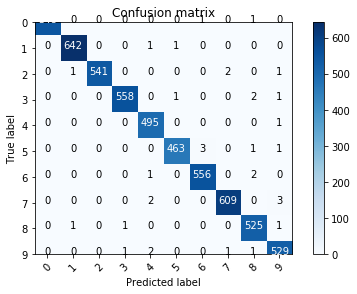

In [34]:
import numpy as np
# Look at confusion matrix 
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


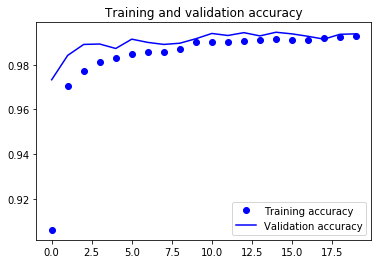

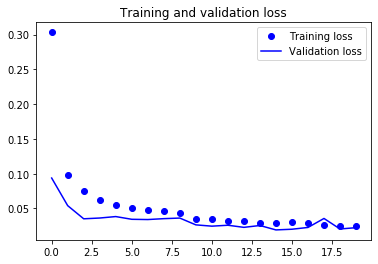

In [35]:
print(h.history.keys())
accuracy = h.history['acc']
val_accuracy = h.history['val_acc']
loss = h.history['loss']
val_loss = h.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
#ict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])

plt.show()

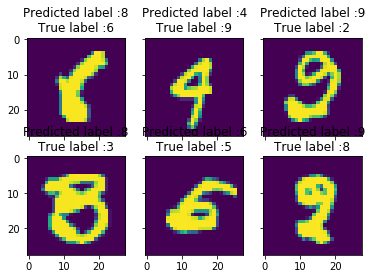

In [36]:
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)
# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

/Users/sumogroup/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=[<tf.Tenso...)`
  """


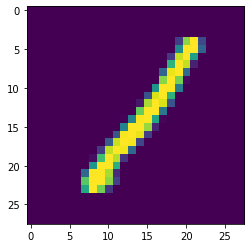

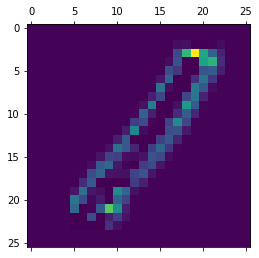

In [49]:
test_im = X_train[6]
plt.imshow(test_im.reshape(28,28), cmap='viridis', interpolation='none')
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(input=model.input, output=layer_outputs)
activations = activation_model.predict(test_im.reshape(1,28,28,1))

first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 9], cmap='viridis')

In [50]:
model.layers[:-1]

/Users/sumogroup/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


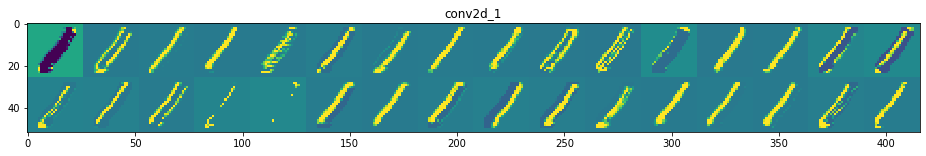

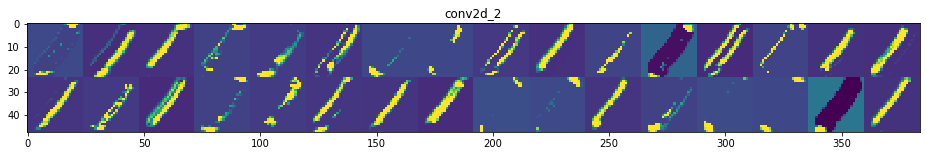

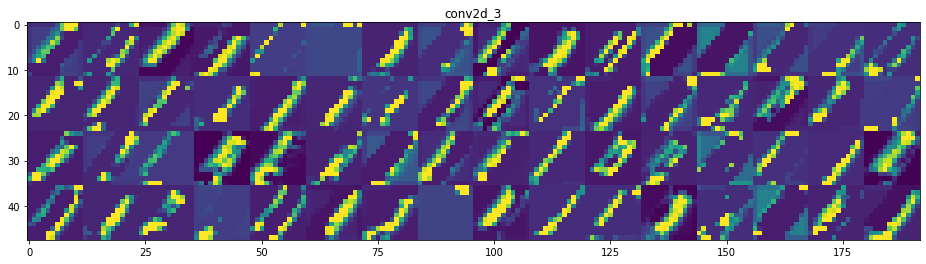

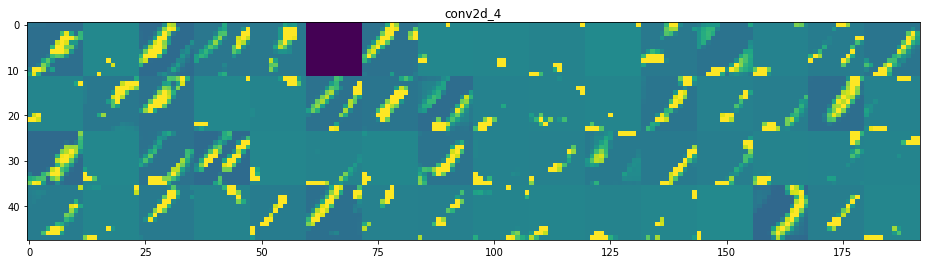

In [51]:
layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('conv'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

/Users/sumogroup/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


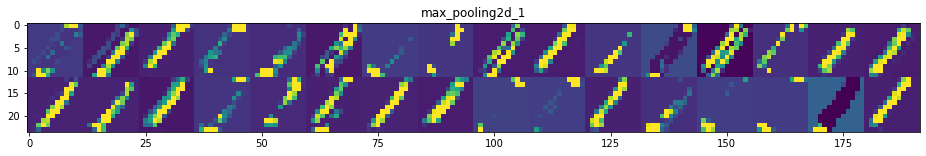

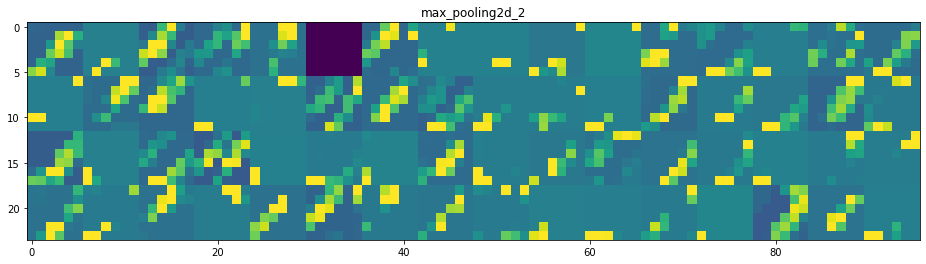

In [52]:
layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('max'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

/Users/sumogroup/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


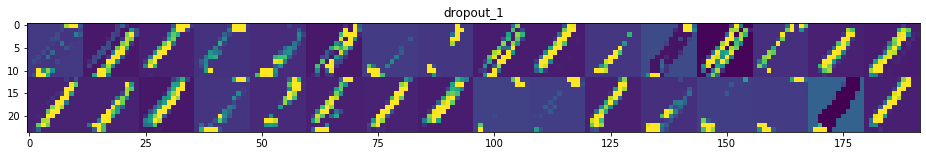

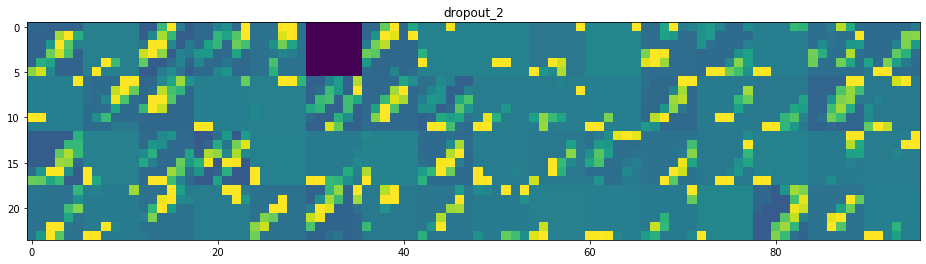

In [53]:
layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('drop'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [56]:
type(predicted_classes)

numpy.ndarray

In [57]:
predicted_classes.shape

(10000,)

In [58]:
testLabels.shape

(10000, 1)

In [37]:
type(testLabels)

pandas.core.frame.DataFrame

In [55]:
#get the predictions for the test data
predicted_classes = model.predict_classes(X_test)

#get the indices to be plotted
y_true = testLabels.values.ravel()
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

In [39]:
y_true

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [40]:
predicted_classes

array([7, 2, 1, ..., 4, 5, 6])

In [59]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       980
     Class 1       1.00      1.00      1.00      1135
     Class 2       1.00      1.00      1.00      1032
     Class 3       1.00      1.00      1.00      1010
     Class 4       0.99      1.00      1.00       982
     Class 5       1.00      1.00      1.00       892
     Class 6       1.00      0.99      1.00       958
     Class 7       0.99      1.00      1.00      1028
     Class 8       0.99      1.00      1.00       974
     Class 9       1.00      0.99      1.00      1009

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [27]:
model.save('my_model_1.h5')
json_string = model.to_json()